In [1]:
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')
mp.jupyter.init()

%load_ext autoreload
%autoreload 2


In [2]:
pkg = mp.jupyter.open_package()
#pkg = mp.jupyter.open_source_package()
pkg

# Response to Resistance
`austintexas.gov-response_to_resistance-1.1.1` Last Update: 2020-06-10T18:00:26

_Austin Police Department response to police resistance incidents._


This data package collects multiple years of the Response to Resistance dataset
from the Autin Police department. It includes each of the four source files and
a fifth file tha combines the four source files.

The souces files, one year of data per file, have slightly different columns,
so in the combined file there are some columns which will not have data across
all years. These columns are:

* census_tract
* county
* location_1
* zip
* county_description

The combined file also has a set of dummy variables for each of the values of
the `subject_resistance` variable. The categories for `subject_resistance`
change from year to year, and some codes from earlier years are "expired" in
later years. The expiration tags have been removed, so the dummy variables mix
expired and unexpired codes. This is because there are many
`subject_resistance` values that only have expired codes in them. The original
values etained in `subject_resistance`
## Documentation Links

* [Data Dictionary](https://data.austintexas.gov/Public-Safety/GUIDE-2017-R2R/27tg-e4dt/data) A spreadsheet with field definitions, for 2017
* [R2R Datasets](https://data.austintexas.gov/browse?q=Response+To+Resistence&sortBy=relevance&page=1) A search on the Austin open data site for R2R datasets.

 

## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)

## Resources

* ** [r2r_2015](data/r2r_2015.csv)**. Response to Resistance, 2015
* ** [r2r_2016](data/r2r_2016.csv)**. Response to Resistance, 2016
* ** [r2r_2017](data/r2r_2017.csv)**. Response to Resistance, 2017
* ** [r2r_2018](data/r2r_2018.csv)**. Response to Resistance, 2018
* ** [r2r_2015_2018](data/r2r_2015_2018.csv)**. Combined R2R files, 2015 to 2018

In [3]:
df = pkg.resource('r2r_2015_2018').dataframe()

In [4]:
df.head().T

,0,1,2,3,4
rin,154619,154620,155009,154764,154859
primary_key,201510652,201510652,201510652,201520457,201520457
date_occurred,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-02 00:00:00,2015-01-02 00:00:00
time_occurred,0220,0225,,0943,0943
location,E 6TH ST / TRINITY ST,E 6TH ST / TRINITY ST,E 6TH ST / TRINITY ST,1900 FARO DR,1900 FARO DR
area_command,GE,GE,GE,HE,HE
nature_of_contact,VIEWED OFFENSE,VIEWED OFFENSE,VIEWED OFFENSE,DISPATCHED CALL,DISPATCHED CALL
reason_desc,NECESSARY TO EFFECT ARREST / DETENTION,NECESSARY TO EFFECT ARREST / DETENTION,NECESSARY TO EFFECT ARREST / DETENTION,TO RESTRAIN FOR SUBJECTS SAFETY,"IN CUSTODY, MAINTAINING CONTROL"
r2r_level,3,3,3,3,3
master_subject_id,459228703: 201510652,459228703: 201510652,459228703: 201510652,356649076: 201520457,356649076: 201520457


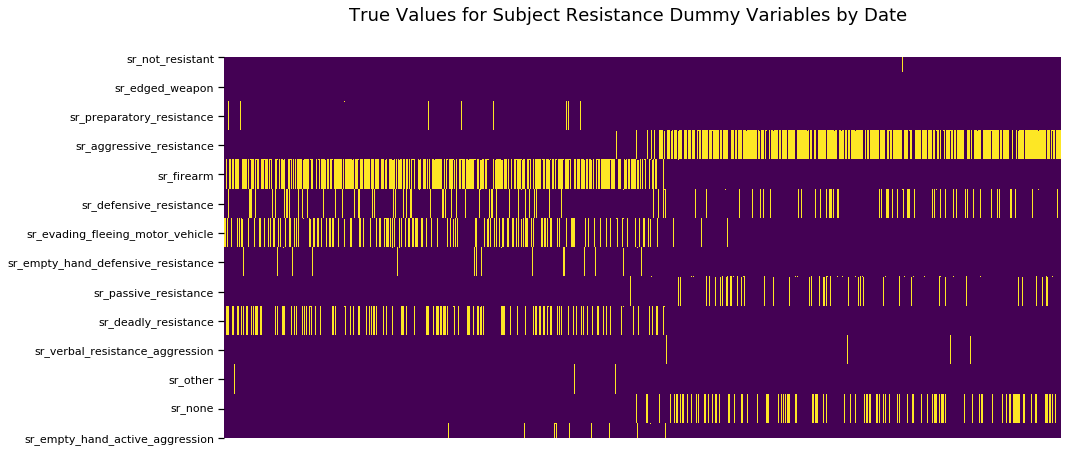

In [8]:
cols = [ c for c in df.columns if c.startswith('sr_')]
t = df.sort_values('date_occurred')
fig, ax = plt.subplots(figsize=(15,.5*len(cols)))
sns.heatmap(t[cols].T,cbar=False,xticklabels=False,cmap = 'viridis', ax=ax )
fig.suptitle('True Values for Subject Resistance Dummy Variables by Date', fontsize=18)
plt.savefig('../docs/sr_dummy_coverage.png')

In [ ]:
df.sr_firearm.sum()